# Laboratorio 1 - Parte 1

### Regresión polinomial múltiple

### 2019 - II

#### Profesor: Julián D. Arias Londoño
#### julian.ariasl@udea.edu.co


## Guía del laboratorio

En este archivo va a encontrar tanto celdas de código como celdas de texto con las instrucciones para desarrollar el laboratorio.

Lea atentamente las instrucciones entregadas en las celdas de texto correspondientes y proceda con la solución de las preguntas planteadas.

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

### Primer integrante:
Nombre: Jorge Hiler Ricardo


#### Segundo integrante:

Nombre: Santiago Gaviria Zapata


In [23]:
import numpy as np
import numpy.matlib as npMatlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

#Algunas advertencias que queremos evitar
import warnings
warnings.filterwarnings("always")

train = pd.read_csv(r'DB/train.csv')

test = pd.read_csv(r'DB/test.csv')

## Ejercicio 1: Contextualización del problema

El problema de *regresión* que abordaremos consiste en predecir el valor de la humedad absoluta en el aire, a partir de varias variables sensadas en el aire (Para más información sobre la base de datos y la contextualización del problema, consulte: http://archive.ics.uci.edu/ml/datasets/air+quality). Ejecute la siguiente celda para cargar los datos.

In [24]:


def fillNAs(train, test):
    naTrainColumns = train.columns[train.isna().any()].tolist()
    train[naTrainColumns[0]].fillna(train[naTrainColumns[0]].mean(), inplace = True)
    train[naTrainColumns[1]].fillna('None', inplace = True)
    train[naTrainColumns[2]].fillna(train[naTrainColumns[2]].mean(), inplace = True)
    train[naTrainColumns[3]].fillna('NA', inplace = True)
    train[naTrainColumns[4]].fillna('NA', inplace = True)
    train[naTrainColumns[5]].fillna('NA', inplace = True)
    train[naTrainColumns[6]].fillna('NA', inplace = True)
    train[naTrainColumns[7]].fillna('NA', inplace = True)
    train[naTrainColumns[8]].fillna('SBrkr', inplace = True)
    train[naTrainColumns[9]].fillna('NA', inplace = True)
    train[naTrainColumns[10]].fillna('NA', inplace = True)
    train[naTrainColumns[11]].fillna(train[naTrainColumns[11]].mean(), inplace = True)
    train[naTrainColumns[12]].fillna('NA', inplace = True)
    train[naTrainColumns[13]].fillna('NA', inplace = True)
    train[naTrainColumns[14]].fillna('NA', inplace = True)
    
    naTrainResultantColumns = train.columns[train.isna().any()].size
    print('Numero de columnas con valores NA: ', naTrainResultantColumns)
    
    naTestColumns = test.columns[test.isna().any()].tolist()
    
    test[naTestColumns[0]].fillna('RL', inplace = True)
    test[naTestColumns[1]].fillna(test[naTestColumns[1]].mean(), inplace = True)
    test[naTestColumns[2]].fillna('None', inplace = True)
    test[naTestColumns[3]].fillna(test[naTestColumns[3]].mean(), inplace = True)
    test[naTestColumns[4]].fillna('NA', inplace = True)
    test[naTestColumns[5]].fillna('NA', inplace = True)
    test[naTestColumns[6]].fillna('NA', inplace = True)
    test[naTestColumns[7]].fillna('NA', inplace = True)
    test[naTestColumns[8]].fillna(test[naTestColumns[8]].mean(), inplace = True)
    test[naTestColumns[9]].fillna('NA', inplace = True)
    test[naTestColumns[10]].fillna(test[naTestColumns[10]].mean(), inplace = True)
    test[naTestColumns[11]].fillna(test[naTestColumns[11]].mean(), inplace = True)
    test[naTestColumns[12]].fillna(test[naTestColumns[12]].mean(), inplace = True)
    test[naTestColumns[13]].fillna(test[naTestColumns[13]].mean(), inplace = True)
    test[naTestColumns[14]].fillna(test[naTestColumns[14]].mean(), inplace = True)
    test[naTestColumns[15]].fillna('NA', inplace = True)
    test[naTestColumns[16]].fillna('NA', inplace = True)
    test[naTestColumns[17]].fillna(test[naTestColumns[17]].mean(), inplace = True)
    test[naTestColumns[18]].fillna('NA', inplace = True)
    test[naTestColumns[19]].fillna(round(float(test[naTestColumns[19]].mean()), 1), inplace = True)
    test[naTestColumns[20]].fillna(test[naTestColumns[20]].mean(), inplace = True)
    test[naTestColumns[21]].fillna('NA', inplace = True)
    test[naTestColumns[22]].fillna('NA', inplace = True)
    
    naTestResultantColumns = train.columns[train.isna().any()].size
    print('Numero de columnas con valores NA: ', naTestResultantColumns)
    
    if (naTrainResultantColumns == 0 & naTestResultantColumns == 0):
        return print("Lllenado de campos vacíos completado")
    else: 
        return print("Llenado de campos vacíos erróneo")

fillNAs(train, test)

Numero de columnas con valores NA:  0
Numero de columnas con valores NA:  0
Lllenado de campos vacíos completado


#### Responda:

1.1 Cuántas muestras tiene la base de datos?: 




In [42]:

#Deleted columns 'cause had a lot of NA > 80%: 'Alley','Fence','MiscFeature','PoolQC'
#Deleted columns 'cause the std = 0: 'Utilities' %rep = 1, 'Street' %rep =1,
#'LandSlope' %rep = 0.95, Condition2 %rep = 1445/1460, RoofMatl %rep = 1434/1460, 
# Heating %rep = 1428/1460, LowQualFinSF %rep = 1436/1460, 
# PoolArea %rep = 1454/1460, 3SsnPorch %rep = 1438/1460

def deleteColumns(train, test):
    columnsToDelete = ['Id','Utilities','Street','LandSlope', 'Condition2', 'RoofMatl',  'Heating', 'LowQualFinSF', 'PoolArea', '3SsnPorch']
    train.drop(labels = columnsToDelete, axis = 1, inplace = True)
    test.drop(labels = columnsToDelete, axis = 1, inplace = True)
    
deleteColumns(train, test)

1.2 Cuántas caracteristicas tiene el problema?: 



In [56]:

def mergeTrainAndTest(train, test):
    trainToMerge = train.copy()
    trainToMerge.drop(labels = 'SalePrice', axis = 1, inplace = True)
    trainToMerge['Set'] = 'train'
    testToMerge = test.copy()
    testToMerge['Set'] = 'test'
    db = trainToMerge.copy()
    db = db.append(testToMerge)
    return db

def convertToCategories(db):
    db["ExterQual"] = db["ExterQual"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    db["ExterCond"] = db["ExterCond"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    db["BsmtQual"] = db["BsmtQual"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    db["BsmtCond"] = db["BsmtCond"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    db["BsmtExposure"] = db["BsmtExposure"].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0})
    db["HeatingQC"] = db["HeatingQC"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    db["KitchenQual"] = db["KitchenQual"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
    db["FireplaceQu"] = db["FireplaceQu"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    db["GarageQual"] = db["GarageQual"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    db["GarageCond"] = db["GarageCond"].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA': 0})
    for i in db.select_dtypes(include='object').columns.to_list():
        db[i] = db[i].astype('category')

db = mergeTrainAndTest(train, test)
convertToCategories(db)

db.dtypes.value_counts()




int64       32
float64     11
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

<b>Nota</b>: Agregue una celda en la cual incluya las líneas de código usadas para responder las preguntas.

## Ejercicio 2: Completar código 

Analice los siguientes métodos de la teoría vista para los modelos de *regresión polinomial múltiple*, tales como el error cuadrático medio (<font color='blue'>ECM</font>), modelo de regresión múltiple (<font color='blue'>regression</font>), potencia del polinomio (<font color='blue'>potenciaPolinomio</font>) y gradiente descendente. 

Una vez comprenda su funcionamiento proceda a realizar lo siguiente: 
1. Completar el código de la regla de actualización de los parámetros del algoritmo de <font color='blue'>gradiente_descedente</font>: 

$$w_j(iter) = w_j(iter-1) - \eta \frac{\partial E(w)}{\partial w_j}$$ 

2. Graficar el error cuadrático: Error cuadrático medio (ECM) vs. las iteraciones del algoritmo. La gráfica debe llevar título y los correspondientes nombres de los ejes, puedes consultar documentación [aquí](https://matplotlib.org/tutorials/introductory/pyplot.html).

In [17]:
#Error cuadrático medio (criterio para el modelo de regresión polinomial)
def ECM(Y_est,Y):
    N = np.size(Y)
    ecm = np.sum((Y_est.reshape(N,1) - Y.reshape(N,1))**2)/(2*N)
    return ecm 

#Modelo Regresión Múltiple
def regression(X, W):
    Yest = np.dot(X,W)    #con np.dot se realiza el producto matricial. Aquí X es dim [Nxd] y W es dim [dx1]
    return Yest           #Esta variable contiene la salida de f(X,W)




#Potencia de polinomio

def potenciaPolinomio(X,grado):
    X2 = X
    
    if grado != 1:
        for i in range(2,grado+1):
            Xadd = X**i
            X2 = np.concatenate((X2, Xadd), axis=1)
    return X2

In [18]:
"""Gradiente descendente para regresión lineal múltiple
X: Matriz de datos extendida.
W: Vector de parámetros del modelo
eta: Taza de aprendizaje
"""
#X es db que son los datos de tamaño (9357, 13),
#Y 
#eta es la tasa de aprendizaje
def gradiente_descendente(X,Y,eta):
     
    #Extendemos la matriz de X para el parámetro independiente
    unos = np.array([np.ones(np.size(X,0))])
    #Concatenamos el vector de unos con la matriz X
    X = np.concatenate((unos.T, X), axis=1)
    X = X.reshape(np.size(X,0),np.size(X,1))                 #Una forma de concatenar
    
    Y = Y.reshape(np.size(Y), 1)
    
    #Tomamos el número de variables del problema
    d = np.size(X,1)
    
    #Tomamos el número de muestras de la base de datos
    N = np.size(X,0)
    
    
    #Inicializamos el vector de parámetros 
    W = np.zeros((1,d))
    W = W.reshape(np.size(W), 1)
    
    eta = eta
    
    iteraciones = 500
    ecms = np.zeros(iteraciones)

    #Aquí se completa el código
    for iter in range(iteraciones):
        t1 = regression(X, W)
        ecms[iter] = ECM(t1,Y)
        t2 = t1 - Y
        t3 = regression(X.T,t2)
        W = W - eta*t3/N
    print ('Vector de parámetros del modelo:\n')
    print (W)
    print ('\nError Final durante el entrenamiento = ' + str(ecms[-1]))
    
    #Aquí debe completar el código para realizar la gráfica de ecms vs. iteraciones
    plt.plot(ecms) #.plot al mandarle el vector de errores realizara la gráfica considerando el índice como valor del eje X y en el eje Y considerara el valor en ese posición.
    plt.xlabel('Iteraciones')
    plt.ylabel('ECM')
    plt.show()
    
    return W
    

## Ejercicio 3: Entrenamiento

En este punto debe hacer uso de las funciones escritas en el punto anterior para realizar el proceso de *modelamiento y simulación* de los datos de cargados en el Ejercicio # 1 sobre la predicción del valor de la humedad absoluta en el aire 

A continuación complete el siguiente código llamando a la función <font color='blue'>gradiente_descedente</font> pasandole los parámetros correspondientes (X,y,eta). Debe obtener como salida el vector de parámetros $w$ estimado y la gráfica del error cuadrático medio vs iteraciones.

*Nota*: No olvide definir el grado del polinomio y la taza de aprendizaje (eta)

Vector de parámetros del modelo:

[[-0.03558286]
 [-0.00760703]
 [ 0.14589709]
 [ 0.00056729]
 [ 0.18655297]
 [ 0.12276975]
 [-0.01743444]
 [ 0.12055326]
 [-0.01071878]
 [ 0.13127053]
 [ 0.09924746]
 [ 0.18613645]
 [ 0.17949134]
 [ 0.00736734]
 [ 0.08054878]
 [ 0.00161679]
 [-0.18966752]
 [ 0.05855624]
 [-0.02293723]
 [ 0.05259963]
 [-0.01124688]
 [ 0.07302795]
 [ 0.04483504]
 [-0.189486  ]
 [-0.18484703]
 [-0.00737505]
 [ 0.05540281]
 [ 0.00209904]
 [ 0.1897046 ]
 [ 0.03995969]
 [-0.02377138]
 [ 0.03288018]
 [-0.0164239 ]
 [ 0.05055312]
 [ 0.03027589]
 [ 0.18971435]
 [ 0.18901517]
 [ 0.00737481]
 [ 0.03929238]
 [ 0.00187827]
 [-0.18971626]
 [ 0.02779026]
 [-0.02256594]
 [ 0.01988023]
 [-0.0154394 ]
 [ 0.03641631]
 [ 0.02146369]
 [-0.189714  ]
 [-0.18958202]
 [-0.00737482]
 [ 0.02930819]
 [ 0.00156331]
 [ 0.18971489]
 [ 0.02029578]
 [-0.02050606]
 [ 0.01242566]
 [-0.02096423]
 [ 0.02715222]
 [ 0.01617985]
 [ 0.18971529]
 [ 0.18969964]]

Error Final durante el entrenamiento = 682.844212

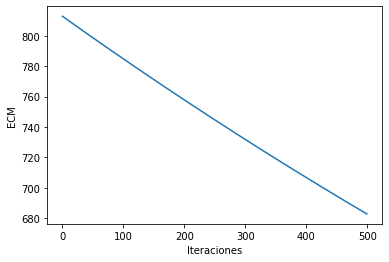


Error durante la prueba = 711.4024391442923


In [40]:
from numpy import random
import math
N = np.size(X,0)

# #Se modifica la matriz de datos original de acuerdo al grado del polinomio ingresado para el modelo
grado = 5
X2 = potenciaPolinomio(X,grado)

#Dejamos algunas muestras para el proceso de entrenamiento y otras para evaluar qué tan bueno fue el aprendizaje del modelo
random.seed(1)
ind=np.random.permutation(N)
Xtrain = X2[ind[0:int(math.ceil(0.7*N))],:]
Xtest = X2[ind[int(math.ceil(0.7*N)):N],:]
Ytrain = Y[ind[0:int(math.ceil(0.7*N))]]
Ytest = Y[ind[int(math.ceil(0.7*N)):N]]

#Normalizamos los datos
media = np.mean(Xtrain)
desvia = np.std(Xtrain)
Xtrain = stats.stats.zscore(Xtrain)
Xtest = (Xtest - npMatlib.repmat(media, Xtest.shape[0], 1))/np.matlib.repmat(desvia, Xtest.shape[0], 1)

eta = 1e-5

#Complete la siguiente línea de código llamando el método gradiente_descendente con sus respectivos argumentos
W = gradiente_descendente(Xtrain, Ytrain , eta)

#Evaluamos las predicciones del modelo con los datos de test
unos = np.array([np.ones(np.size(Xtest,0))])
Xtest = np.concatenate((unos.T, Xtest), axis=1)
Xtest = Xtest.reshape(np.size(Xtest,0),np.size(Xtest,1))
Yest = regression(Xtest, W)
Error = ECM(Yest,Ytest)
print ('\nError durante la prueba = ' + str(Error))

#### Responda:

3.1 ¿Cuál es el número de coeficientes $w$ que se obtienen al ingresar un polinomio de grado 4? ¿Por qué?:



In [21]:
grado = 4
size = np.size(potenciaPolinomio(X, grado),1)
terminoIndependiente = 1
realSize = size + terminoIndependiente
print(realSize)

49


3.2 La funci&oacute;n polin&oacute;mica que se est&aacute; usando para grados mayores a 1
est&aacute; incompleta, ¿Por qu&eacute;?:

Debido a que falta el producto entre caracteristicas que resulta de extender la expresión polinomica a un grado mayor a uno.

## Ejercicio 4: Obtener resultados

Identifique la variable "eta" (tasa de aprendizaje $\eta$) en el código anterior, cambie su valor de acuerdo a la siguiente tabla. Haga lo mismo con el valor del grado del polinomio y complete las columnas ECM_Entrenamiento y ECM_Prueba.

Tenga en cuenta que cuando el valor de $\eta$ sea $0.00001$ y el grado del polinomio sea $1$, el valor del ECM de prueba debe ser $703.376$. Esto le servirá de criterio de verificación para la implementación de su algorítmo de gradiente descendente.


In [11]:
import numpy as np
import pandas as pd
import qgrid as qg
randn = np.random.randn
df_types = pd.DataFrame({
    'Tasa de aprendizaje' : pd.Series(['1e-5', '1e-5', '1e-5', '1e-5', '1e-5', '1e-3', '1e-3', '1e-3', '1e-3', '1e-3', '1e-1', '1e-1', '1e-1', '1e-1', '1e-1']),
    'Grado del polinomio' : pd.Series([1,2,3,4,5,1,2,3,4,5,1,2,3,4,5])})
df_types["ECM_Entrenamiento"] = ""
df_types["ECM_Prueba"] = ""
df_types.set_index(['Tasa de aprendizaje','Grado del polinomio'], inplace=True)
df_types["ECM_Entrenamiento"][0] = "774.055"
df_types["ECM_Prueba"][0] = "703.376"
df_types.sort_index(inplace=True)
qgrid_widget = qg.show_grid(df_types, show_toolbar=False)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Ejecute la siguiente instrucción para dejar guardados en el notebook los resultados de las pruebas.

In [41]:
qgrid_widget.get_changed_df()

ECM_Entrenamiento  \
Tasa de aprendizaje Grado del polinomio                           
1e-1                1                         0.977575296199192   
                    2                        0.0784519997923453   
                    3                      0.026102487460899822   
                    4                      0.011738944770606972   
                    5                    1.5603169565474126e+61   
1e-3                1                         47.35025615066436   
                    2                         19.39505680915447   
                    3                         13.53232189764733   
                    4                        11.345170378458585   
                    5                        10.481429642201135   
1e-5                1                                   774.055   
                    2                         748.1860686316447   
                    3                         724.9884414455062   
                    4                         703.4089638629132   
                    5                         682.8442125040657   

                                                     ECM_Prueba  
Tasa de aprendizaje Grado del polinomio                          
1e-1                1                        1323.8770206809477  
                    2                         778.5218253112232  
                    3                          690.233116765249  
                    4                         680.6499964607167  
                    5                    1.4752669004685983e+60  
1e-3                1                        432.23837215035917  
                    2                         666.7086861202492  
                    3                         714.7263534639737  
                    4                         716.3726048028662  
                    5                         711.2596887212198  
1e-5                1                                   703.376  
                    2                         709.8817822551225  
                    3                         709.8470702955602  
                    4                         711.3700120556157  
                    5                         711.4024391442923

## Ejercicio 5: Pruebas

En la celda de código del Ejercicio # 3, comente la línea donde se normalizan las matrices de datos Xtrain y Xtest. Realice pruebas para diferentes valores de $\eta$ y de grado del polinomio de manera similar a los valores que usó en el punto 3. Observe que pasa con el ECM.

#### Responda

5.1 ¿Qué sucede con los valores del ECM?



Los valores del ECM se desbordan

5.2 ¿A qué se debe lo que observa?


Debido a que la convergencia entre caracteristicas se reduce por falta de normalización

5.3.1 ¿Qu&eacute; proceso hace la normalizaci&oacute;n sobre los datos? 




Cambia los valores del dataset a una escala común sin distorsionar las diferencias en los rangos de valores.

5.3.2 Consulte por qu&eacute; es necesaria la normalizaci&oacute;n en el modelo de regresi&oacute;n  y cu&aacute;les son los tipos de normalizaci&oacute;n m&aacute;s comunes. 

Es necesaria porque es posible que algunas características sean cuantitativamente mucho mayores que las demás lo que puede causar que contribuyan a la variación en el término independiente aunque no necesariamente sean más importantes. Algunos de los métodos de normalización son: decimal scaling, min-max normalization y z-score.

5.3.3 ¿Cu&aacute;l de ellos se aplic&oacute; en el laboratorio?

El método utilizado en este laboratorio fue z-score. 
